[@LorenaABarba](https://twitter.com/LorenaABarba)

12 steps to Navier–Stokes
=====
***

You should have completed your own code for [Step 5](./07_Step_5.ipynb) before continuing to this lesson. As with Steps 1 to 4, we will build incrementally, so it's important to complete the previous step!

We continue ...

Step 6: 2-D Convection
----
***

Now we solve 2D Convection, represented by the pair of coupled partial differential equations below:  

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

Discretizing these equations using the methods we've applied previously yields:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

Rearranging both equations, we solve for $u_{i,j}^{n+1}$ and $v_{i,j}^{n+1}$, respectively.  Note that these equations are also coupled.  

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$

### Initial Conditions

The initial conditions are the same that we used for 1D convection, applied in both the x and y directions.  

$$u,\ v\ = \begin{cases}\begin{matrix}
2 & \text{for } x,y \in (0.5, 1)\times(0.5,1) \cr
1 & \text{everywhere else}
\end{matrix}\end{cases}$$

### Boundary Conditions

The boundary conditions hold u and v equal to 1 along the boundaries of the grid
.

$$u = 1,\ v = 1 \text{ for } \begin{cases} \begin{matrix}x=0,2\cr y=0,2 \end{matrix}\end{cases}$$

In [1]:
using Plots

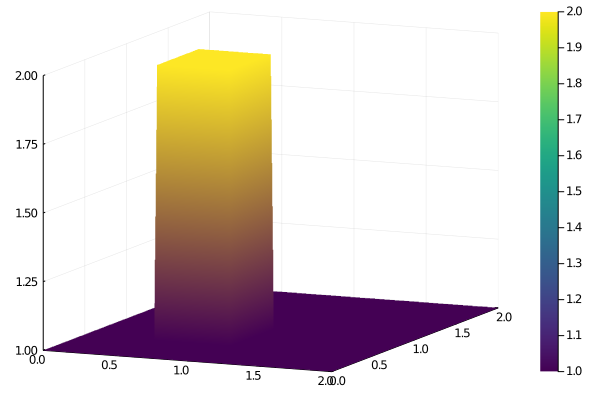

In [2]:
###variable declarations
nx = 101
ny = 101
nt = 80
c = 1
Δx = 2 / (nx - 1)
Δy = 2 / (ny - 1)
σ = .2
Δt = σ * Δx

x = range(0, stop=2, length=nx)
y = range(0, stop=2, length=ny)

u = ones(ny,nx)
v = ones(ny,nx)

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[0.5 .≤ y .≤ 1, 0.5 .≤ x .≤ 1] .= 2
v[0.5 .≤ y .≤ 1, 0.5 .≤ x .≤ 1] .= 2

surface(x,y,u,colour=:viridis)

In [5]:
u = ones(ny,nx)
v = ones(ny,nx)

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[0.5 .≤ y .≤ 1, 0.5 .≤ x .≤ 1] .= 2
v[0.5 .≤ y .≤ 1, 0.5 .≤ x .≤ 1] .= 2

uⁿ⁺¹ = u
vⁿ⁺¹ = v

for n in 1:nt+1 ##loop across number of time steps
    uⁿ = copy(uⁿ⁺¹)
    vⁿ = copy(vⁿ⁺¹)
    
    # u and v are computed on the same grid so either u or v can be passed to size
    row, col = size(uⁿ⁺¹)
    
    for j ∈ 1:row
        for i ∈ 1:col
            # Implement boundary conditions using conditional (if/else) statements see lesson 06 for more details
            if j == 1
                uⁿ⁺¹[j,i] = 1.0
                vⁿ⁺¹[j,i] = 1.0
            elseif j == row
                uⁿ⁺¹[j,i] = 1.0
                vⁿ⁺¹[j,i] = 1.0
            elseif i == col
                uⁿ⁺¹[j,i] = 1.0
                vⁿ⁺¹[j,i] = 1.0
            elseif i == 1
                uⁿ⁺¹[j,i] = 1.0
                vⁿ⁺¹[j,i] = 1.0
            else
                uⁿ⁺¹[j,i] = (uⁿ[j, i] - 
                            uⁿ[j, i]*(c * Δt / Δx * (uⁿ[j, i] - uⁿ[j, i - 1])) - 
                            vⁿ[j, i]*(c * Δt / Δy * (uⁿ[j, i] - uⁿ[j - 1, i])))
                vⁿ⁺¹[j,i] = (vⁿ[j, i] - 
                            uⁿ[j, i]*(c * Δt / Δx * (vⁿ[j, i] - vⁿ[j, i - 1])) - 
                            vⁿ[j, i]*(c * Δt / Δy * (vⁿ[j, i] - vⁿ[j - 1, i])))
            end
        end
    end
end

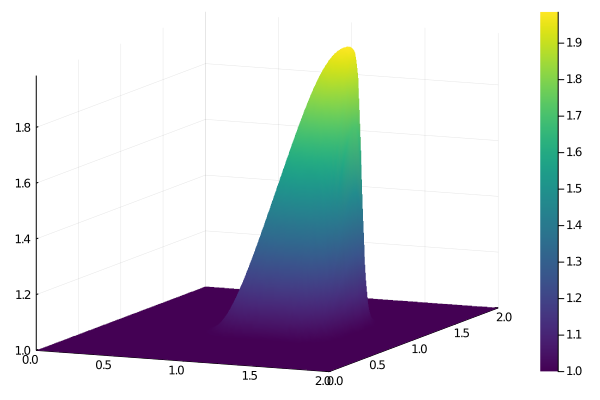

In [6]:
surface(x,y,u,colour=:viridis)

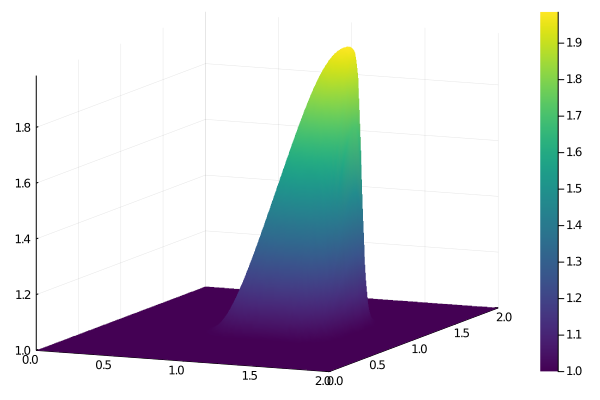

In [7]:
surface(x,y,v,colour=:viridis)

## Learn More

The video lesson that walks you through the details for Steps 5 to 8 is **Video Lesson [6](https://youtube.com/watch?v=tUg_dE3NXoY)** on You Tube: